In [2]:
import numpy as np
import matplotlib.pyplot as plt
import functions

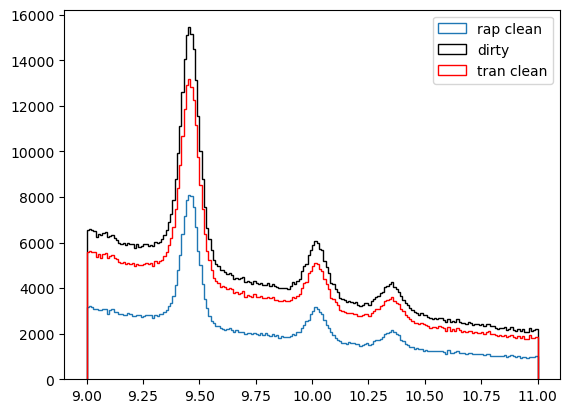

In [5]:
xmass_ups = np.load('ups_anal/xmass.npy')
rap_ups = np.load('ups_anal/rap.npy')
tran_ups = np.load('ups_anal/mom_tran_pair.npy')
tran_1_ups = np.load('ups_anal/mom_tran_1.npy')
tran_2_ups = np.load('ups_anal/mom_tran_2.npy')

xmass_ups_clean_1 = xmass_ups[(rap_ups > 2) & (rap_ups < 4)]

xmass_ups_clean_2 = xmass_ups[(np.log10(tran_ups) > 0.2) & (np.log10(tran_ups) < 1.1)]

n_bins = 1000

n_bins_cor = int(0.2*n_bins)

count_rap, bins_rap, patches = plt.hist(xmass_ups_clean_1, bins = n_bins_cor, histtype= 'step', label = 'rap clean')
count, bins, patches = plt.hist(xmass_ups, bins = n_bins_cor, histtype= 'step', color = 'k', label = 'dirty')
plt.hist(xmass_ups_clean_2, bins = n_bins_cor, histtype= 'step', color = 'r', label = 'tran clean')
plt.legend()

plt.show()

In [6]:
rap_side = np.sum(count_rap[(bins_rap[1:] > 9.0) & (bins_rap[1:] < 9.2)])
rap_peak = np.sum(count_rap[(bins_rap [1:]> 9.35) & (bins_rap[1:] < 9.55)])

raw_side = np.sum(count[(bins[1:] > 9.0) & (bins[1:] < 9.2)])
raw_peak = np.sum(count[(bins[1:] > 9.35) & (bins[1:] < 9.55)])

print(raw_peak/rap_peak)
print(raw_side/rap_side)

2.0134005125142096
2.1869967089139415


when cleaning using the rapidity, the peaks decreased more that the sideband region

What you want is the sideband region to decrease more than the peak region, to increase the intensity of the peaks

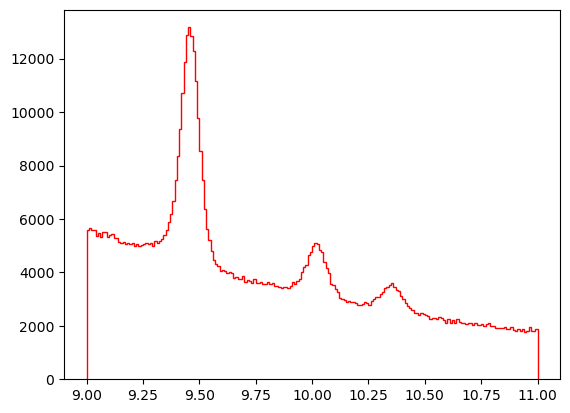

In [7]:
plt.hist(xmass_ups_clean_2, bins = n_bins_cor, histtype= 'step', color = 'r', label = 'rap_tran clean')
plt.show()

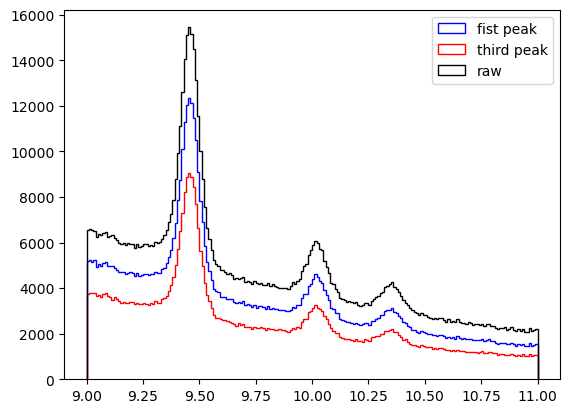

In [8]:
tran_dif = tran_2_ups - tran_1_ups

xmass_clean_3 = xmass_ups[(tran_dif > -5) & (tran_dif < 5)]
xmass_clean_4 = xmass_ups[(tran_dif > -3) & (tran_dif < 3)]

count_3, bins_3, patches_3 = plt.hist(xmass_clean_3, bins = n_bins_cor, histtype = 'step', color = 'b', label = 'fist peak', range = (9,11))

count_4, bins_4, patches_4 = plt.hist(xmass_clean_4, bins = n_bins_cor, histtype = 'step', color = 'r', label = 'third peak', range = (9,11))

count_raw, bins_raw, patches_raw = plt.hist(xmass_ups, bins = n_bins_cor, histtype= 'step', color = 'k', label = 'raw')
plt.legend()
plt.show()

bins_3 = bins_3[1:]
bins_4 = bins_4[1:]
bins_raw = bins_raw[1:]

here the third and first label to using the third or first peak as reference to purify the data. The data point taken 

In [9]:
raw_side = np.sum(count_raw[(bins_raw > 9.0) & (bins_raw < 9.25)])

first_side = np.sum(count_3[(bins_3 > 9.0) & (bins_3 < 9.25)])

third_side = np.sum(count_4[(bins_4 > 9.0) & (bins_4 < 9.25)])

raw_peak = np.sum(count_raw[(bins_raw > 9.3) & (bins_raw < 9.6)])

first_peak = np.sum(count_3[(bins_3 > 9.3) & (bins_3 < 9.6)])

third_peak = np.sum(count_4[(bins_4 > 9.3) & (bins_4 < 9.6)])

peak_rat_raw_first = raw_peak/first_peak

side_rat_raw_first = raw_side/first_side

print(f"{peak_rat_raw_first = }\n{side_rat_raw_first = }")

peak_rat_raw_third = raw_peak/third_peak

side_rat_raw_third = raw_side/third_side

print(f"{peak_rat_raw_third = }\n{side_rat_raw_third = }")

rat_raw = raw_peak/raw_side

rat_first = first_peak/first_side

print(f"{rat_raw = }\n{rat_first = }")

peak_rat_raw_first = 1.2941506570568344
side_rat_raw_first = 1.3168934095120972
peak_rat_raw_third = 1.7817078823790233
side_rat_raw_third = 1.8133378804271132
rat_raw = 1.7199138775219036
rat_first = 1.7501387785777118


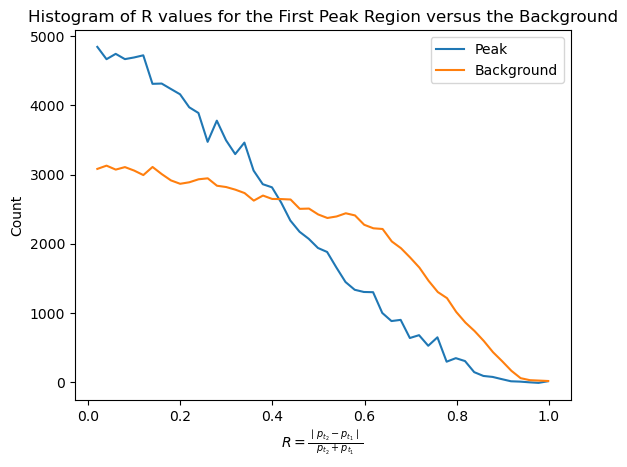

In [10]:
R = np.absolute(tran_2_ups - tran_1_ups)/(tran_2_ups + tran_1_ups)

R_side = np.concatenate((R[(xmass_ups > 9.1) & (xmass_ups < 9.2)], R[(xmass_ups > 9.7) & (xmass_ups < 9.8)]))

R_peak = R[(xmass_ups > 9.35) & (xmass_ups < 9.55)]

count_side, bins_side , patches = plt.hist(R_side, bins = 50, histtype = 'step', label = 'side', density=False)
count_peak, bins_peak, patches = plt.hist(R_peak, bins = 50, histtype = 'step', color = 'r', label = 'peak', density=False)
plt.clf()

plt.plot(bins_peak[1:], count_peak - count_side, label = 'Peak')
plt.plot(bins_side[1:], count_side, label = 'Background')
plt.ylabel('Count')
plt.xlabel(r'$ R = \frac{ \mid p_{t_2} - p_{t_1} \mid}{p_{t_2} + p_{t_1}} $')
plt.title('Histogram of R values for the First Peak Region versus the Background')
plt.legend()
plt.show()

As we want R values that are lower than the average background R values, We can take all the points that have below R=0.42, and these points are going to more likely correspond to data from the decays. Therefore the data will be cleaned. This same value of R=0.42 can be used to clean the entire dataset.

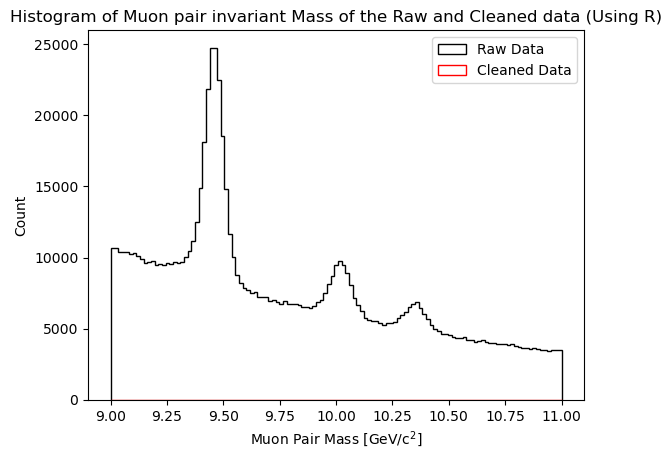

200


In [11]:
xmass_ups_clean = xmass_ups[R < 0.42]
count_raw, bins_raw, patches_raw = plt.hist(xmass_ups, bins = 123, histtype= 'step', color = 'k', label = 'Raw Data')
bins_raw = bins_raw[1:]

count_clean, bins_clean, _ = plt.hist(xmass_ups_clean, bins = 123, histtype = 'step', color = 'r', label = 'Cleaned Data', density = True)
bins_clean = bins_clean[1:]
plt.xlabel(r'Muon Pair Mass [GeV/c$^2$]')
plt.ylabel('Count')
plt.title('Histogram of Muon pair invariant Mass of the Raw and Cleaned data (Using R)')
plt.legend()
plt.show()
print(int(0.2*n_bins))

In [ ]:


first_side = np.sum(count_clean[(bins_clean > 9.0) & (bins_clean < 9.25)])


raw_peak = np.sum(count_raw[(bins_raw > 9.3) & (bins_raw < 9.6)])

first_peak = np.sum(count_clean[(bins_clean > 9.3) & (bins_clean < 9.6)])

print(f"{raw_peak/first_peak = :.5}\n{raw_side/first_side = :.5}")

raw_peak/first_peak = 1.4048e+04
raw_side/first_side = 1.5884e+04


Text(0.5, 1.0, 'Cleaned 2D Histogram of R versus Muon pair mass')

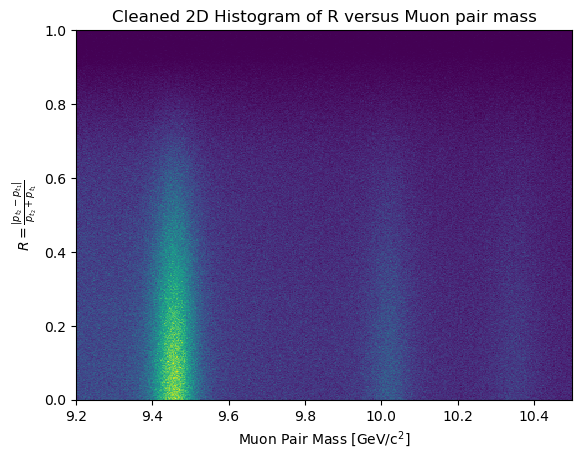

In [17]:
xmass_big = np.load('ups_big_anal/xmass_big.npy')
tran_1_big = np.load('ups_big_anal/mom_tran_1_big.npy')
tran_2_big = np.load('ups_big_anal/mom_tran_2_big.npy')

R = np.absolute((tran_2_big - tran_1_big)/(tran_2_big + tran_1_big))

plt.hist2d(xmass_big, R, bins = 400, range = [[9.2,10.5],[0,1.0]])
plt.ylabel(r'$ R = \frac{ | p_{t_2} - p_{t_1} |}{p_{t_2} + p_{t_1}} $')
plt.xlabel(r'Muon Pair Mass [GeV/c$^2$]')
plt.title('Cleaned 2D Histogram of R versus Muon pair mass')